<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [22]</a>'.</span>

In [1]:
# ! pip install --upgrade pip
# ! pip install --upgrade git+https://github.com/oda-hub/oda_api@request-list pandas
# ! pip install linked-data-latex
# ! pip install ruamel.yaml
# ! pip install pymosaic-fits


import oda_api.api
import oda_api.token
import oda_api.plot_tools
import requests
import logging
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np
from ddpaper.draftdata import DraftData

# https://gcn.gsfc.nasa.gov/gcn3/32634.gcn3

In [2]:
# oda:version "v0.1"
focus_obs_name = "total_3p"

In [3]:
# #slightly more verbose
logging.getLogger().setLevel(logging.INFO)
# #all messages
#logging.getLogger().setLevel(logging.DEBUG)

logging.getLogger('oda_api').addHandler(logging.StreamHandler())

In [4]:
# 120711 https://www.aanda.org/articles/aa/pdf/2014/07/aa20872-12.pdf
# https://www.cosmos.esa.int/web/integral/schedule-information

In [5]:
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np
import ddpaper.draftdata

import logging

logging.basicConfig(level="INFO")

In [6]:
import os
import sys
sys.path.insert(0, os.path.join(os.getenv("HOME"), "linked-data-latex"))
import importlib


In [7]:
T0_isot = "2022-10-09T13:17:00"
T0_ijd = Time(T0_isot).mjd - 51544
src_coord = SkyCoord("19h 13m 03.43s", "+19d 46m 23.1s", unit=u.deg)
source_name = "GRB221009A"



In [8]:
ddpaper.draftdata.dump_notebook_globals("eventinfo", globals(), ['T0_isot', 'T0_ijd', 'source_name', 'src_coord'])        


INFO:ddpaper.draftdata:can not open ./draftdata/eventinfo.yaml due to [Errno 2] No such file or directory: './draftdata/eventinfo.yaml' FileNotFoundError(2, 'No such file or directory'), will create a new one


INFO:ddpaper.draftdata:storing in eventinfo


INFO:ddpaper.draftdata:storing T0_ijd = 8317.553472222222


INFO:ddpaper.draftdata:T0_ijd = 8317.553472222222 can be represented as 8317.553472222222
...



INFO:ddpaper.draftdata:storing T0_isot = 2022-10-09T13:17:00


INFO:ddpaper.draftdata:T0_isot = 2022-10-09T13:17:00 can be represented as '2022-10-09T13:17:00'



INFO:ddpaper.draftdata:storing source_name = GRB221009A


INFO:ddpaper.draftdata:source_name = GRB221009A can be represented as GRB221009A
...



INFO:ddpaper.draftdata:storing src_coord = <SkyCoord (ICRS): (ra, dec) in deg
    (288.26429167, 19.77308333)>


INFO:ddpaper.draftdata:src_coord = <SkyCoord (ICRS): (ra, dec) in deg
    (288.26429167, 19.77308333)> can be represented as !astropy.coordinates.sky_coordinate.SkyCoord
dec: !astropy.coordinates.Latitude
  unit: &id001 !astropy.units.Unit {unit: deg}
  value: 19.773083333333332
frame: icrs
ra: !astropy.coordinates.Longitude
  unit: *id001
  value: 288.26429166666657
  wrap_angle: !astropy.coordinates.Angle
    unit: *id001
    value: 360.0
representation_type: spherical



In [9]:
# set!

# focus_obs_name = "total_3p"
# focus_obs_name = "r2562"
# focus_obs_name = "r2560"
# focus_obs_name = "r2559"
# focus_obs_name = "r2558"

obs_by_name = dict(
    total_3p=dict(
        obs_T1_isot = "2022-10-08T00:39:04",
        obs_T2_isot = "2022-10-23T08:02:00"
    ))

for r in 2558, 2559, 2560, 2561, 2562:
    t1, t2 = [Time(float(t)+51544, format='mjd').isot for t in requests.get(f'https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/REVNUM/{r}/IJD').text.split()[1:]]
    obs_by_name[f'r{r}']=dict(
        obs_T1_isot = t1,
        obs_T2_isot = t2
    )

focus_obs = obs_by_name[focus_obs_name]

with DraftData() as dd:
    if 'obs' not in dd:
        dd['obs'] = {}
    dd['obs'][focus_obs_name] = focus_obs


obs_draft_data = DraftData(focus_obs_name)

focus_obs


{'obs_T1_isot': '2022-10-08T00:39:04', 'obs_T2_isot': '2022-10-23T08:02:00'}

In [10]:

# for obs_name, obs in obs_by_name.items():
#     requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/integralhk/api/v1.0/sc/{obs['obs_T1_isot']}/{obs['obs_T2_isot']}")

In [11]:
scw_dict_cons = pd.DataFrame(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/{focus_obs['obs_T1_isot']}/{focus_obs['obs_T2_isot']}?"
             f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=10&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP").json())
scw_dict_nrt = pd.DataFrame(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/nrt/{focus_obs['obs_T1_isot']}/{focus_obs['obs_T2_isot']}?"
             f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=10&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP").json())

scw_dict_cons['SCWVER'] = "001"
scw_dict_nrt['SCWVER'] = "000"

scw_dict = pd.concat([scw_dict_cons, scw_dict_nrt])
            

scw_list = []
for i, r in scw_dict[scw_dict['SW_TYPE'].str.strip() == "POINTING"].iterrows():
    scw_list.append(r['SWID'] + "." + r['SCWVER'])

print("\n".join(scw_list))

with obs_draft_data as dd:
    dd['telapse_sum_s'] = np.sum(scw_dict.TELAPSE[scw_dict['SW_TYPE'].str.strip() == "POINTING"])    
    dd['tstart_ijd'] = np.min(scw_dict.TSTART[scw_dict['SW_TYPE'].str.strip() == "POINTING"])    
    dd['tstop_ijd'] = np.max(scw_dict.TSTOP[scw_dict['SW_TYPE'].str.strip() == "POINTING"])    
    dd['telapse_total_s'] = (dd['tstop_ijd'] - dd['tstart_ijd'])*24*3600
    
dd

INFO:ddpaper.draftdata:can not open ./draftdata/total_3p.yaml due to [Errno 2] No such file or directory: './draftdata/total_3p.yaml' FileNotFoundError(2, 'No such file or directory'), will create a new one


255800700010.001
255800710010.001
255800720010.001
255800730010.001
255800740010.001
255800750010.001
255800760010.001
255800770010.001
255800780010.001
255800790010.001
255800800010.001
255800810010.001
255800820010.001
255800820020.001
255900010010.001
255900020010.001
255900030010.001
255900040010.001
255900050010.001
255900060010.001
255900070010.001
255900080010.001
255900090010.001
255900100010.001
255900110010.001
255900120010.001
255900130010.001
255900140010.001
255900150010.001
255900160010.001
255900170010.001
255900180010.001
255900190010.001
255900200010.001
255900210010.001
255900220010.001
255900230010.001
255900240010.001
255900250010.001
255900260010.001
255900270010.001
255900280010.001
255900290010.001
255900300010.001
255900310010.001
255900320010.001
255900330010.001
255900340010.001
255900350010.001
255900360010.001
256000290010.001
256000300010.001
256000310010.001
256000320010.001
256000330010.001
256000340010.001
256000350010.001
256000360010.001
256000370010.0

{'telapse_sum_s': 299168.1950822531,
 'tstart_ijd': 8318.60328288933,
 'tstop_ijd': 8327.74081283347,
 'telapse_total_s': 789482.5871737499}

In [12]:
disp = oda_api.api.DispatcherAPI()
# disp_collection = oda_api.api.DispatcherAPICollection(use_local_cache=True)
disp.use_local_cache = True
disp.wait = True

source_images = {}

pars = []

for i in ['isgri', 'jemx1', 'jemx2']:
    instrument = i[:-1] if i.startswith('jemx') else i
    product = instrument + "_image"
    jemx_num= int(i[-1]) if i.startswith('jemx') else 1
    E1_keV, E2_keV = (3, 30) if i.startswith('jemx') else (28, 80)
    

    source_images[i] = disp.get_product(
        instrument=instrument,
        product=product,
        E1_keV=E1_keV,
        E2_keV=E2_keV,
        jemx_num=jemx_num,
        integral_data_rights="all-private",
        scw_list=scw_list,
        token=oda_api.token.discover_token()
    #     src_coord
    )


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/api.py:1247: UserWarning: 
----------------------------------------------------------------------------
the parameter: jemx_num   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T_format', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'detection_threshold', 'image_scale_min', 'image_scale_max']
----------------------------------------------------------------------------

  warnings.warn(msg)
- waiting for remote response (since 2023-01-28 00:28:03), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:28:03), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


session: 0GVB4PET4ITMZOFE job: 7c67b4a396dcd7da


INFO:oda_api.api:session: 0GVB4PET4ITMZOFE job: 7c67b4a396dcd7da



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 7c67b4a396dcd7da


INFO:oda_api.api.dispatcherapi:... assigned job id: 7c67b4a396dcd7da


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


query complete: terminating


INFO:oda_api.api.dispatcherapi:query complete: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


Please note that argument jemx_num is not used


- waiting for remote response (since 2023-01-28 00:28:23), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:28:23), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


session: 0GVB4PET4ITMZOFE job: 7ebd8d58e1636011


INFO:oda_api.api:session: 0GVB4PET4ITMZOFE job: 7ebd8d58e1636011



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 7ebd8d58e1636011


INFO:oda_api.api.dispatcherapi:... assigned job id: 7ebd8d58e1636011


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


query complete: terminating


INFO:oda_api.api.dispatcherapi:query complete: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


- waiting for remote response (since 2023-01-28 00:28:42), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:28:42), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


session: 0GVB4PET4ITMZOFE job: 8fe5e8855ba49b69


INFO:oda_api.api:session: 0GVB4PET4ITMZOFE job: 8fe5e8855ba49b69



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 8fe5e8855ba49b69


INFO:oda_api.api.dispatcherapi:... assigned job id: 8fe5e8855ba49b69


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


query complete: terminating


INFO:oda_api.api.dispatcherapi:query complete: terminating


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


Set MJD-OBS to 59862.602477 from DATE-OBS.
Set MJD-END to 59871.740012 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 59862.602477 from DATE-OBS.
Set MJD-END to 59871.740012 from DATE-END'.


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.


Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''.


can not plot known sources: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 0).


can not plot known sources: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 0).


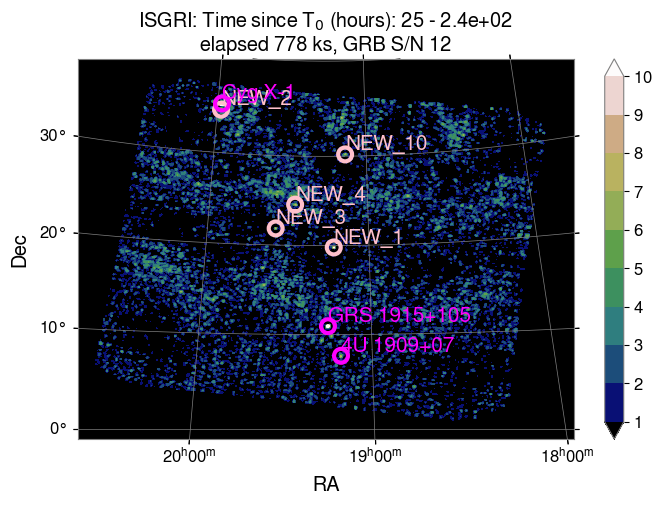

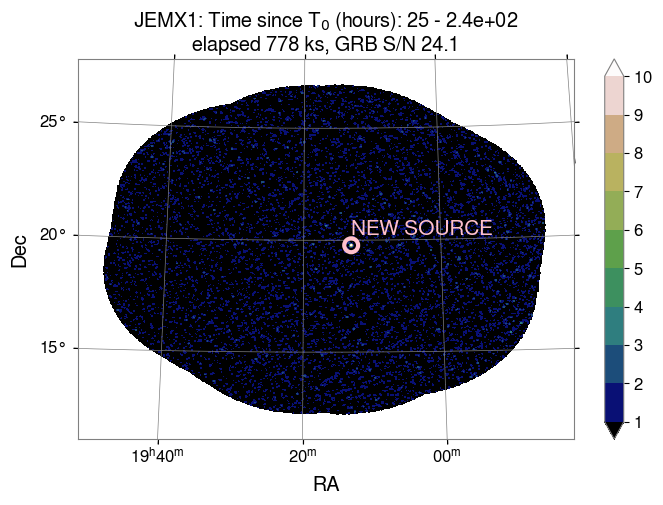

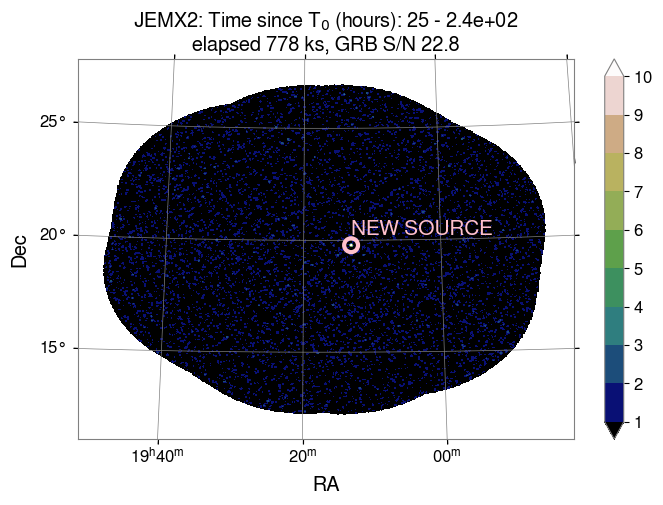

In [13]:
for name, image in source_images.items():
    if image:
        h = image.mosaic_image_0_mosaic.data_unit[4].header
        t = image.dispatcher_catalog_1.table        
        m = SkyCoord(t['ra'], t['dec']).separation(src_coord).arcmin <10

        try:
            snr = t[m]['significance'][0]
        except:
            snr = 0

        t = Time(h['TSTART'] + 51544, format='mjd').isot
        (im:=oda_api.plot_tools.OdaImage(image)).show(sliders=False)
        im.write_fits(f'{name}_{focus_obs_name}_')
        plt.title(f"{name.upper()}: Time since T$_0$ (hours): {(h['TSTART'] - T0_ijd)*24:.2g} - {(h['TSTOP'] - T0_ijd)*24:.2g}\n"
                  f"elapsed {int(h['TSTOP'] - h['TSTART'])*24*3.6:.3g} ks, GRB S/N {snr:.3g}")

In [14]:
# ! pip install pymosaic-fits
import mosaic
import importlib
importlib.reload(mosaic)
mosa = mosaic.FITsMosaic()

from astropy.io import fits

tag = focus_obs_name

for ins in 'jemx1', 'jemx2': #, 'isgri':
    f = fits.open(f"{ins}_{tag}_mosaic.fits")

    new_hdus = [fits.PrimaryHDU()]

    for i in f[2:-1]:

        for k, v in dict(i.header).items():
            if str(v).strip() == 'Real':
                print('patching', k)
                i.header[k] = 1000

        if i.header.get('IMATYPE', '') == 'RECONSTRUCTED':
            i.header['IMATYPE'] = 'INTENSITY'

        i.header['TELAPSE'] = 1000
        i.header['TFIRST'] = 0
        i.header['TLAST'] = 1000
        i.header['E_MIN'] = 3.04
        i.header['E_MAX'] = 29.84
        print(i.header.get('IMATYPE', '??'))
        new_hdus.append(i)
        
        
    fits.HDUList(new_hdus).writeto(f"{ins}_{tag}_mosaic_mod.fits", overwrite=True)
    mosa.add(fits.open(f"{ins}_{tag}_mosaic_mod.fits"))

mosa.writeto(f'jemxX_{tag}_mosaic.fits')


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''.


INFO:root:first mosaic


INFO:root:adding mosaic


patching TELAPSE
INTENSITY
patching TELAPSE
VARIANCE
patching TELAPSE
SIGNIFICANCE
patching TELAPSE
EXPOSURE
patching TELAPSE
INTENSITY
patching TELAPSE
VARIANCE
patching TELAPSE
SIGNIFICANCE
patching TELAPSE
EXPOSURE


In [15]:
cat = source_images['isgri'].dispatcher_catalog_1

toremove = []
for i, r in enumerate(cat.table.iterrows()):
    print(r)
    if r[1].startswith('NEW_') or r[1].startswith('GRB') or r[1].startswith('SGR'):
        toremove.append(i)        

cat.table.add_row(
{
    'src_names': source_name,
    'ra': src_coord.ra.deg,
    'dec': src_coord.dec.deg,
    # 'ISGRI_FLAG': 1,
    'FLAG': 1,
    'ERR_RAD': 0.05,    
})

sgr = SkyCoord.from_name('SGR 1935+2154')
cat.table.add_row(
{
    'src_names': 'SGR 1935+2154',
    'ra': sgr.ra.deg,
    'dec': sgr.dec.deg,
    # 'ISGRI_FLAG': 1,
    'FLAG': 1,
    'ERR_RAD': 0.05,    
})


cat.table.remove_rows(toremove)

cat.table

(6, '4U 1909+07', 7.68655252456665, 287.6927490234375, 7.671976089477539, -32768, 1, 0, 0.006670000031590462)
(9, 'Cyg X-1', 179.51397705078125, 299.59222412109375, 35.21139144897461, -32768, 2, 0, 0.0002800000074785203)
(10, 'GRS 1915+105', 18.59465217590332, 288.8119201660156, 10.92378044128418, -32768, 2, 0, 0.0002800000074785203)
(81, 'NEW_1', 11.971981048583984, 288.26470947265625, 19.784151077270508, -32767, 0, 0, None)
(82, 'NEW_2', 8.591896057128906, 299.63812255859375, 34.56344985961914, -32767, 0, 0, None)
(83, 'NEW_3', 9.315675735473633, 293.7027282714844, 21.874448776245117, -32767, 0, 0, None)
(84, 'NEW_4', 7.005819797515869, 291.93133544921875, 24.596267700195312, -32767, 0, 0, None)
(90, 'NEW_10', 7.7991533279418945, 287.08465576171875, 30.19842529296875, -32767, 0, 0, None)


meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str13,float64,float64,float64,int64,int64,int64,object
6,4U 1909+07,7.68655252456665,287.6927490234375,7.671976089477539,-32768,1,0,0.006670000031590462
9,Cyg X-1,179.51397705078125,299.59222412109375,35.21139144897461,-32768,2,0,0.0002800000074785203
10,GRS 1915+105,18.59465217590332,288.8119201660156,10.92378044128418,-32768,2,0,0.0002800000074785203
0,GRB221009A,0.0,288.26429166666657,19.773083333333332,0,0,1,0.05
0,SGR 1935+2154,0.0,293.732,21.89672222,0,0,1,0.05


In [16]:
from astropy.table import Table

m_source = [not s.startswith('NEW') for s in cat.table['src_names']]
cat.table = Table(cat.table[m_source])

cat.get_api_dictionary()

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[6, 9, 10, 0, 0], ["4U 1909+07", "Cyg X-1", "GRS 1915+105", "GRB221009A", "SGR 1935+2154"], [7.68655252456665, 179.51397705078125, 18.59465217590332, 0.0, 0.0], [287.6927490234375, 299.59222412109375, 288.8119201660156, 288.26429166666657, 293.732], [7.671976089477539, 35.21139144897461, 10.92378044128418, 19.773083333333332, 21.89672222], [-32768, -32768, -32768, 0, 0], [1, 2, 2, 0, 0], [0, 0, 0, 1, 1], [0.006670000031590462, 0.0002800000074785203, 0.0002800000074785203, 0.05, 0.05]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U13"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

In [17]:

# from ddpaper.draftdata import DraftData

with obs_draft_data as dd:
    dd['obs'] = dict(
    )


In [18]:
import time


source_products = {}

while len(source_products) == 0 or None in list(source_products.values()):
    for product in [
            "isgri_lc",
            "isgri_spectrum",
            "isgri_image",
            "isgrihe_image",
            "jemx1_lc",
            "jemx1_spectrum",
            "jemx1_image",
            "jemx2_lc",
            "jemx2_spectrum",
            "jemx2_image",
        ]:
        disp.wait = False
        
        if 'jemx' in product:
            e1, e2 = 4, 30
        else:
            e1, e2 = 28, 80
        
        jnum = 1
        product_pass = product

        if 'jemx1' in product:
            jnum=1
            product_pass = product.replace("jemx1_", "jemx_")
        elif 'jemx2' in product:
            jnum=2
            product_pass = product.replace("jemx2_", "jemx_")
        elif 'isgrihe' in product:
            e1, e2 = 80, 200
            product_pass = product.replace("isgrihe_", "isgri_")
        
        source_products[product] = disp.get_product(
            instrument=product_pass.split("_")[0],
            product=product_pass,
            osa_version="OSA11.2",
            scw_list=scw_list,
            token = oda_api.token.discover_token(),
            E1_keV=e1,
            E2_keV=e2,
            jemx_num=jnum,
            selected_catalog=cat.get_api_dictionary(),
            integral_data_rights="all-private",
        )
    time.sleep(5)

found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/api.py:1247: UserWarning: 
----------------------------------------------------------------------------
the parameter: jemx_num   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T_format', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'time_bin', 'time_bin_format']
----------------------------------------------------------------------------

  warnings.warn(msg)
- waiting for remote response (since 2023-01-28 00:29:05), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:29:05), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


session: BZ0C8GDYWTZ9TZXZ job: ee2fdcd572c252dc


INFO:oda_api.api:session: BZ0C8GDYWTZ9TZXZ job: ee2fdcd572c252dc



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: ee2fdcd572c252dc


INFO:oda_api.api.dispatcherapi:... assigned job id: ee2fdcd572c252dc


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/api.py:1247: UserWarning: 
----------------------------------------------------------------------------
the parameter: jemx_num   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T_format', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV']
----------------------------------------------------------------------------

  warnings.warn(msg)
- waiting for remote response (since 2023-01-28 00:29:11), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:29:11), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


Please note that argument jemx_num is not used


session: BZ0C8GDYWTZ9TZXZ job: 4784e73a9ae1936e


INFO:oda_api.api:session: BZ0C8GDYWTZ9TZXZ job: 4784e73a9ae1936e



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 4784e73a9ae1936e


INFO:oda_api.api.dispatcherapi:... assigned job id: 4784e73a9ae1936e


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


Please note that argument jemx_num is not used


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/api.py:1247: UserWarning: 
----------------------------------------------------------------------------
the parameter: jemx_num   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T_format', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'detection_threshold', 'image_scale_min', 'image_scale_max']
----------------------------------------------------------------------------

  warnings.warn(msg)
- waiting for remote response (since 2023-01-28 00:29:24), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:29:24), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


session: BZ0C8GDYWTZ9TZXZ job: 0c3c61a952d44126


INFO:oda_api.api:session: BZ0C8GDYWTZ9TZXZ job: 0c3c61a952d44126



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 0c3c61a952d44126


INFO:oda_api.api.dispatcherapi:... assigned job id: 0c3c61a952d44126


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/api.py:1247: UserWarning: 
----------------------------------------------------------------------------
the parameter: jemx_num   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T_format', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'detection_threshold', 'image_scale_min', 'image_scale_max']
----------------------------------------------------------------------------

  warnings.warn(msg)
- waiting for remote response (since 2023-01-28 00:29:30), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:29:30), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


Please note that argument jemx_num is not used


session: BZ0C8GDYWTZ9TZXZ job: cc9100e46a6431be


INFO:oda_api.api:session: BZ0C8GDYWTZ9TZXZ job: cc9100e46a6431be



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: cc9100e46a6431be


INFO:oda_api.api.dispatcherapi:... assigned job id: cc9100e46a6431be


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


- waiting for remote response (since 2023-01-28 00:29:37), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:29:37), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


Please note that argument jemx_num is not used


session: BZ0C8GDYWTZ9TZXZ job: 4dc326bf47f49140


INFO:oda_api.api:session: BZ0C8GDYWTZ9TZXZ job: 4dc326bf47f49140



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 4dc326bf47f49140


INFO:oda_api.api.dispatcherapi:... assigned job id: 4dc326bf47f49140


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


- waiting for remote response (since 2023-01-28 00:29:56), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:29:56), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


session: BZ0C8GDYWTZ9TZXZ job: c5e8269fb5e7fb26


INFO:oda_api.api:session: BZ0C8GDYWTZ9TZXZ job: c5e8269fb5e7fb26



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: c5e8269fb5e7fb26


INFO:oda_api.api.dispatcherapi:... assigned job id: c5e8269fb5e7fb26


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


- waiting for remote response (since 2023-01-28 00:30:14), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:30:14), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


session: BZ0C8GDYWTZ9TZXZ job: 79adcff3809b6dc4


INFO:oda_api.api:session: BZ0C8GDYWTZ9TZXZ job: 79adcff3809b6dc4



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 79adcff3809b6dc4


INFO:oda_api.api.dispatcherapi:... assigned job id: 79adcff3809b6dc4


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


- waiting for remote response (since 2023-01-28 00:30:33), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:30:33), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


session: BZ0C8GDYWTZ9TZXZ job: b8369e275881a446


INFO:oda_api.api:session: BZ0C8GDYWTZ9TZXZ job: b8369e275881a446



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: b8369e275881a446


INFO:oda_api.api.dispatcherapi:... assigned job id: b8369e275881a446


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


- waiting for remote response (since 2023-01-28 00:30:50), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:30:50), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


session: BZ0C8GDYWTZ9TZXZ job: 2a221e9c18e7884b


INFO:oda_api.api:session: BZ0C8GDYWTZ9TZXZ job: 2a221e9c18e7884b



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 2a221e9c18e7884b


INFO:oda_api.api.dispatcherapi:... assigned job id: 2a221e9c18e7884b


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


INFO:oda_api.token:found token in TokenLocation.FILE_HOME your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1675155996,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}


token expires in 81.6 h


INFO:oda_api.token:token expires in 81.6 h


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


To disable this message you can pass `.get_product(..., silent=True)`


- waiting for remote response (since 2023-01-28 00:31:08), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


INFO:oda_api.api.dispatcherapi.progress:- waiting for remote response (since 2023-01-28 00:31:08), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis


session: BZ0C8GDYWTZ9TZXZ job: 76ce5bfa2dff0035


INFO:oda_api.api:session: BZ0C8GDYWTZ9TZXZ job: 76ce5bfa2dff0035



... query status prepared => done


INFO:oda_api.api.dispatcherapi:
... query status prepared => done


... assigned job id: 76ce5bfa2dff0035


INFO:oda_api.api.dispatcherapi:... assigned job id: 76ce5bfa2dff0035


query COMPLETED SUCCESSFULLY (state done)


INFO:oda_api.api.dispatcherapi:query COMPLETED SUCCESSFULLY (state done)


non-waiting dispatcher: terminating


INFO:oda_api.api.dispatcherapi:non-waiting dispatcher: terminating


In [19]:
source_products

{'isgri_lc': <oda_api.api.DataCollection at 0x7efd0c2dd9d0>,
 'isgri_spectrum': <oda_api.api.DataCollection at 0x7efd0c2a7880>,
 'isgri_image': <oda_api.api.DataCollection at 0x7efd09690520>,
 'isgrihe_image': <oda_api.api.DataCollection at 0x7efd0957f460>,
 'jemx1_lc': <oda_api.api.DataCollection at 0x7efd0a92d5b0>,
 'jemx1_spectrum': <oda_api.api.DataCollection at 0x7efd0950e4c0>,
 'jemx1_image': <oda_api.api.DataCollection at 0x7efd094ed160>,
 'jemx2_lc': <oda_api.api.DataCollection at 0x7efd0c32ddc0>,
 'jemx2_spectrum': <oda_api.api.DataCollection at 0x7efd0c204640>,
 'jemx2_image': <oda_api.api.DataCollection at 0x7efd096febb0>}

In [20]:
d = source_products['isgrihe_image']
d.dispatcher_catalog_1.get_api_dictionary()

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[1, 3, 4, 5, 6], ["Cyg X-1", "NEW_1", "NEW_2", "NEW_3", "NEW_4"], [47.39950942993164, 7.562999248504639, 7.807381629943848, 7.052416801452637, 7.011020660400391], [299.5924377441406, 278.9412841796875, 282.5292053222656, 276.5103759765625, 279.2969055175781], [35.204044342041016, 5.267766952514648, 20.560827255249023, 6.82019567489624, 4.514084339141846], [-32768, -32767, -32767, -32767, -32767], [2, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0.0, null, null, null, null]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U7"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.


Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''.


can not plot known sources: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 0).


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.


Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''.


can not plot known sources: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 0).


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


Set MJD-OBS to 59862.602477 from DATE-OBS.
Set MJD-END to 59871.740012 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 59862.602477 from DATE-OBS.
Set MJD-END to 59871.740012 from DATE-END'.


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


Set MJD-OBS to 59862.602477 from DATE-OBS.
Set MJD-END to 59871.740012 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 59862.602477 from DATE-OBS.
Set MJD-END to 59871.740012 from DATE-END'.


no GRB here!


/home/savchenk/miniconda-recent/lib/python3.9/site-packages/oda_api/plot_tools.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


no GRB here!


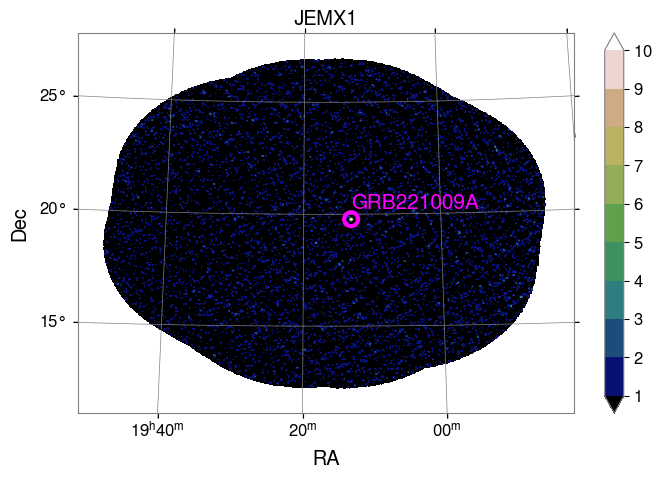

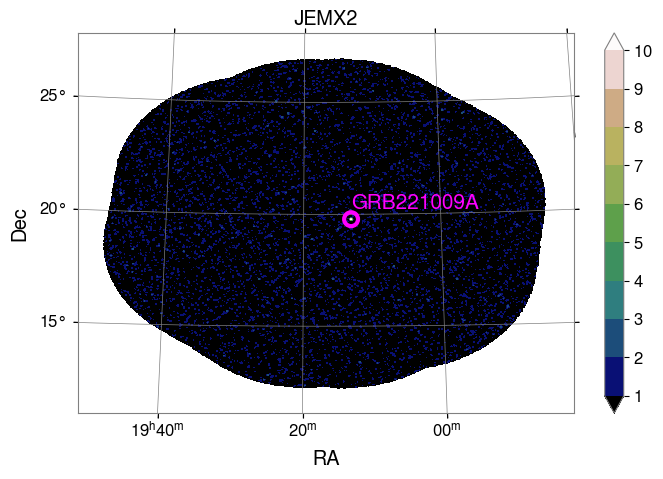

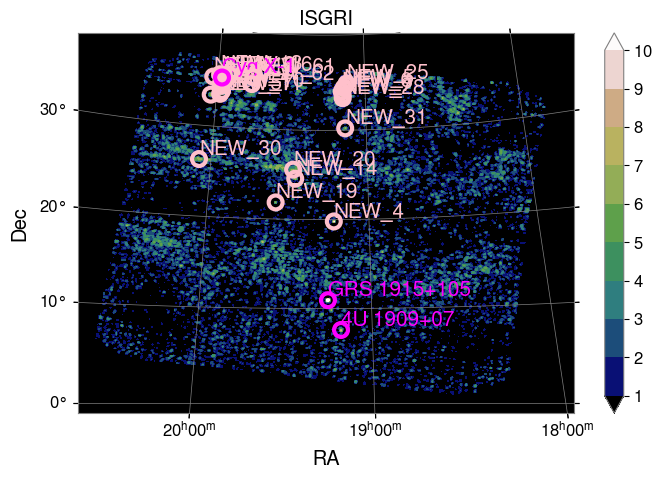

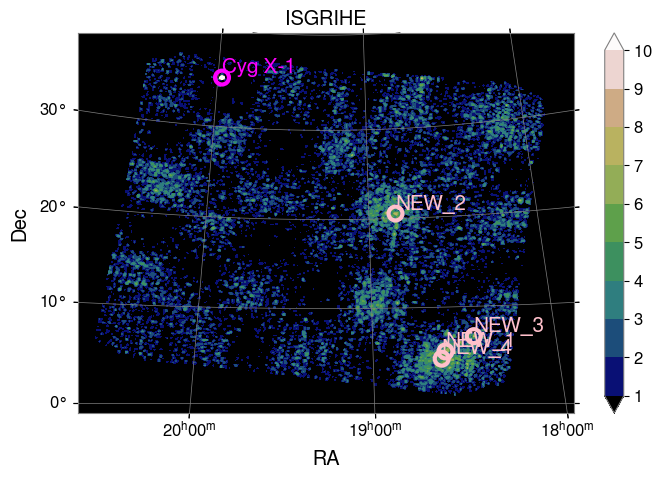

In [21]:
for instrument in 'jemx1', 'jemx2', 'isgri', 'isgrihe':
    p = source_products[instrument + '_image']
    oda_api.plot_tools.OdaImage(p).show(sliders=False) #, header="JEM-X")
    oda_api.plot_tools.OdaImage(p).write_fits(instrument + "_")

    name = instrument.upper() #.replace('JEMX', 'JEM-X')
     
    plt.title(name)
    plt.savefig(f"figs/{instrument}.png")

    with obs_draft_data as dd:
        try:
            dd[instrument] = {'snr': float(p.dispatcher_catalog_1.table[p.dispatcher_catalog_1.table['src_names'] == "GRB221009A"]['significance'][0])}
        except IndexError:
            print("no GRB here!")
        


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

ValueError: 'xerr' must not contain negative values

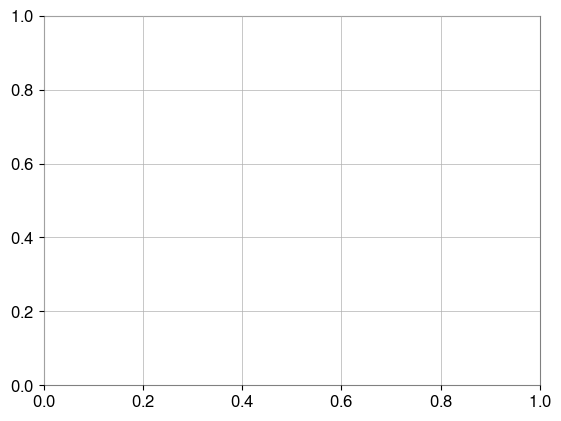

In [22]:
import re

for name in 'GRB221009A', 'SGR 1935+2154':
    name_stub = re.sub("[^0-9a-zA-Z]", "", name).lower()

    for instrument in 'jemx1', 'jemx2', 'isgri':
        oda_api.plot_tools.OdaLightCurve(source_products[instrument + '_lc']).show(in_source_name=name)
        oda_api.plot_tools.OdaLightCurve(source_products[instrument + '_lc']).write_fits(name)
        plt.title(instrument.upper() + " " + name)
        plt.savefig(f"figs/lc_{instrument}_{name_stub}.png")


In [ ]:
for instrument in 'jemx1', 'jemx2', 'isgri':
    p = source_products[instrument + '_spectrum']
    oda_api.plot_tools.OdaSpectrum(source_products[instrument + '_spectrum']).write_fits('GRB221009A')
    
    spec = getattr(p, [l['prod_name'] for l in p.as_list() if l['meta_data:']['src_name'] == 'GRB221009A'][0])
    
    with obs_draft_data as dd:
        if instrument not in dd:
            dd[instrument] = {}
        dd[instrument]['exposure_s'] = spec.data_unit[1].header['EXPOSURE']

In [ ]:
with obs_draft_data as dd:
    dd['joint_fit'] = dict(
        e1_keV=3,
        e2_keV=80,
        flux_ecs = 4.4263e-10, # ergs/cm^2/s) range (3.0000 - 80.000 keV
        flux_ecs_err_68p = (4.215e-10 - 4.4263e-10, 4.670e-10 - 4.4263e-10),
        slope = 2.15041,
        slope_err_90p = (-0.0712388,0.0841283)
    )

In [ ]:
T0bat = Time('2022-10-09 14:10:17')


def xrt_decay(t):
    # #32671
    offset_s = ((T0bat.mjd - 51544) - T0_ijd)*24*3600
    slopes = """Alpha_1 : 2.6 (+0.4, -0.7)
    Tbreak_1: 177.4 (+2.0, -9.6)
    Alpha_2 : 0.144 (+0.022, -0.026)
    Tbreak_2: 610 (+84, -78)
    Alpha_3 : 0.31 (+0.04, -0.03)
    Tbreak_3: 4060 [+0.23, -0.19])
    Alpha_4 : 1.357 (+/-0.010)"""

    slopes =  {s.split(":")[0].strip(): float(s.split(":")[1].split()[0].strip()) for s in slopes.split("\n")}

    for k in slopes:
        if k.startswith('Tbr'):
            slopes[k] += offset_s

    r = t**(-slopes['Alpha_1'])

    m = t > slopes['Tbreak_1'] 
    rn1 = slopes['Tbreak_1']**(-slopes['Alpha_1']) / slopes['Tbreak_1']**(-slopes['Alpha_2'])
    r[m] = t[m]**(-slopes['Alpha_2']) * rn1

    m = t > slopes['Tbreak_2']
    rn2 = slopes['Tbreak_2']**(-slopes['Alpha_2']) / slopes['Tbreak_2']**(-slopes['Alpha_3']) 
    r[m] = t[m]**(-slopes['Alpha_3']) * rn1 * rn2


    m = t > slopes['Tbreak_3']
    rn3 = slopes['Tbreak_3']**(-slopes['Alpha_3']) / slopes['Tbreak_3']**(-slopes['Alpha_4']) 
    r[m] = t[m]**(-slopes['Alpha_4']) * rn1 * rn2 * rn3
    
    return r


t = np.logspace(0,4)

plt.figure()

plt.plot(
    t,
    xrt_decay(t)
)

plt.loglog()


In [ ]:
plt.figure()

d_j1 = fits.open("JMX1_lc_GRB221009A.fits")[1].data
d_j2 = fits.open("JMX2_lc_GRB221009A.fits")[1].data
d_i = fits.open("IBIS_lc_GRB221009A.fits")[1].data

d = d_j2
plt.errorbar(d['TIME'] - T0_ijd, d['RATE'],d['ERROR'])

m = d['TIME'] < 8319.5

# plt.errorbar(
#     np.mean(d['TIME'][m]) - T0_ijd, 
#     np.sum(d['RATE'][m])/np.sum(m),
#     (np.sum(d['ERROR'][m]**2)**0.5/np.sum(m)), lw=3)

T = np.logspace(-1, 1, 60)
Tc = (T[1:] + T[:-1])/2.
dT = (T[1:] - T[:-1])/2.

plt.errorbar(
    Tc, 
    rebin_in_bins(d['TIME'] - T0_ijd, d['RATE'], T),
    rebin_in_bins(d['TIME'] - T0_ijd, d['ERROR'], T, agg=lambda x:(np.sum(x**2))**0.5/len(x)),
    xerr=dT,
    ls="",
     lw=3)


plt.xlim([1,2])
# plt.ylim([0,5])

In [ ]:

rebinned_lc_by_name = {}


for t, dt, r, re, f, n, T in [
    # (d_j1['TIME'], d_j1['TIMEDEL']/2, (d_j1['RATE'] + d_j2['RATE'])/2, (d_j1['ERROR']**2 + d_j1['ERROR']**2)**0.5/2, 1, 'JEMX1+2', np.logspace(-0.2, 1, 35)),
    # (d_j1['TIME'], d_j1['TIMEDEL']/2, d_j1['RATE'], d_j1['ERROR'], 1, 'JEMX1', np.logspace(-1, 1, 10000)),
    (d_j1['TIME'], d_j1['TIMEDEL']/2, d_j1['RATE'], d_j1['ERROR'], 1, 'JEMX1', np.logspace(-0.1, 1, 4)),
    # (d_j2['TIME'], d_j2['TIMEDEL']/2, d_j2['RATE'], d_j2['ERROR'], 1, 'JEMX2', np.logspace(-0.3, 1, 40)),
    (d_i['TIME'], d_i['TIMEDEL'],d_i['RATE'], d_i['ERROR'], 0.01, 'ISGRI', np.logspace(-0.1, 1, 4)),
]:    
    m = r < 6 # noisy scw?
    m &= re < 4 # noisy scw?
    t = t - T0_ijd

    plt.errorbar(t[m], r[m], re[m], xerr=dt[m], alpha=0.5, ls="")

    Tc, dT, X, dX = rebin_bins_in_bins(t[m], dt[m], r[m], re[m], T)

    
    # plt.errorbar(t, r,re,         # xerr=d['TIMEDEL']/2, 
    #     ls="", label=n, alpha=0.2)

    plt.errorbar(
        Tc,
        X,
        dX,
        # rebin_in_bins(t, re, T, agg=lambda x:(np.sum(x**2))**0.5/len(x)),
        xerr=dT,
        ls="", 
        label=n)

    rebinned_lc_by_name[n] = {
        'Tc': Tc,
        'X': X,
        'dX': dX,
        'dT': dT,
    }


# plt.semilogx()
plt.loglog()
# plt.xlim([5e-1, 12])
# plt.xlim([0.8, 1.5])
# plt.ylim([-5, 10])

# rebin_in_bins(t, r, T, agg=np.mean)

In [ ]:
rmax = d_j1[d_j1['RATE'].argmax()]
rmax['TIME']

plt.errorbar(
    d_j2['TIME'] - rmax['TIME'],
    d_j2['RATE'],
    d_j2['ERROR']
)

plt.xlim([-0.2, 0.2])

requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/IJD/{rmax['TIME']}/SCWID").json()

In [ ]:
from scipy.interpolate import interp1d
CS = np.cumsum(np.array(acslc.c) - bkg)
interp1d(CS, acslc.t)(np.linspace(0, CS[-1], int(CS[-1]/1000))).shape

In [ ]:
from statistics import mode

m = acslc.t > 0

plt.figure(figsize=(8,4))


acs_scale = 1/1.5e-10/20

n = 500
c = plt.errorbar(
        (rebin(acslc.t[m], n)/n - T0_ijd),
        (rebin(acslc.c[m], n)/n - bkg - F((rebin(acslc.t[m], n)/n - T0_ijd)*24, *curve[0]))/acs_scale,
        # (rebin(acslc.c, n)/n - bkg - F((rebin(acslc.t, n)/n - T0_ijd)*24, *curve[0]))
        (rebin(acslc.c[m], n))**0.5/n/acs_scale
    )[0].get_color()

# plt.plot(
#     (acslc.t - T0_ijd)*24*3600,
#     acslc.c,
#     # acslc
# )

plt.xlabel(f"days since {T0_isot}")

# plt.axvspan(Time("2022-10-10 13:27:56").mjd - 51544 - T0_ijd, Time("2022-10-10 14:27:28").mjd - 51544 - T0_ijd, alpha=0.2)
# plt.axvspan(Time("2022-10-10 15:02:00").mjd - 51544 - T0_ijd, Time("2022-10-11 04:19:48").mjd - 51544 - T0_ijd, alpha=0.2)


if True:
    from scipy.optimize import minimize

    # minimize()l
    t_model = lambda t, N, slope: N*t**slope
    slope = -1.3
    t_model_noslope = lambda t, N: N*t**slope_0

    def loss(p):
        if len(p) == 1:
            N, = p
            slope = -1.3
        else:
            N, slope = p
            
        d = np.concatenate([
            (t_model(d_j1['TIME'] - T0_ijd, N, slope) - d_j1['RATE']) / d_j1['ERROR'],
            (t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR']
        ])
        

        m = d**2 < np.percentile(d**2, 95)

        # print(N, slope, (d**2).sum(), d_j1[d.argmax()], d_j1[d.argmin()])
        # plt.plot(d_j1['TIME'], d**2)
        return np.sum(d[m]**2) # + \
            #    np.sum(((t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR'])**2) + \
            #    np.sum(((t_model(d_i['TIME'] - T0_ijd, N, slope) - d_i['RATE']) / d_i['ERROR'])**2)

    slope_fitted = slope
    N_fitted, = minimize(loss, [1]).x
    # N_fitted, slope_fitted = minimize(loss, [N_fitted, slope]).x


    t = np.logspace(-1.5, 1, 100) + 200
    plt.plot(t, t_model(t, N_fitted, slope_fitted), ls="--", label=f'fit to JEM-X and ISGRI light curves, slope={slope_fitted:.3g}, N={N_fitted:.2g}')


xrt_norm = 1e3

# t = np.logspace(np.log10(T0bat.mjd - 51544 - T0_ijd), 1, 100)  
# plt.plot(t, xrt_norm*xrt_decay(t*24*3600)*1e8, label="XRT decay", lw=3, ls="-", c='k', alpha=0.5)

plt.legend()

plt.loglog()

plt.xlim([0, 800])
plt.ylim([1e-2, 3e6])

# plt.xlim([-0., 0.5])
# plt.ylim([-300, 300])


# ax_x_hours = plt.twiny()

# plt.ylabel("erg cm$^{-2}$ s$^{-1}$")
plt.ylabel("counts s$^{-1}$")
plt.savefig("figs/joint_lc.png")
# plt.savefig("grb221009-picture/spiacs-lc.png")

# https://www.swift.ac.uk/burst_analyser/01126853/
# https://gcn.gsfc.nasa.gov/gcn3/32671.gcn3

In [ ]:
# from statistics import mode

plt.rc('font', size=16) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=16) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend

d_j1 = source_products['jemx1_lc'].jemx_lc_0_GRB221009A.data_unit[2].data 
d_j2 = source_products['jemx2_lc'].jemx_lc_0_GRB221009A.data_unit[2].data 
d_i = source_products['isgri_lc'].isgri_lc_3_GRB221009A.data_unit[1].data

plt.figure(figsize=(12,7))

tail_change = 670

m = acslc.t  - T0_ijd > 247/24/3600
m &= acslc.t  - T0_ijd < tail_change/24/3600

m_acs_long = acslc.t  - T0_ijd > -200/24/3600
m_acs_long &= acslc.t  - T0_ijd < 0.1


c = plt.plot(
    (acslc.t - T0_ijd)[m],
    (acslc.c - bkg)[m]/acs_scale,
    # alpha=0.2,
    label="SPI-ACS",
    lw=3
)[0].get_color()

# n = 500
# c = plt.errorbar(
#         (rebin(acslc.t[m], n)/n - T0_ijd),
#         (rebin(acslc.c[m], n)/n - bkg - F((rebin(acslc.t[m], n)/n - T0_ijd)*24, *curve[0]))/acs_scale,
#         # (rebin(acslc.c, n)/n - bkg - F((rebin(acslc.t, n)/n - T0_ijd)*24, *curve[0]))
#         (rebin(acslc.c[m], n))**0.5/n/acs_scale
#     )[0].get_color()

tail_change = 0.005
T = np.logspace(np.log10(tail_change), -1.1, 100)
T = np.logspace(np.log10(tail_change), -1.1, 100)

# T = np.concatenate([np.linspace(0, tail_change, int(tail_change/(tail_bins[1] - tail_bins[0]))), tail_bins])

Tc, dT, C, CE = rebin_bins_in_bins(acslc.t - T0_ijd, np.ones_like(acslc.t)*0.05/24/3600/2, acslc.c, acslc.c**0.5, T)

C = C - bkg - F(Tc*24, *curve[0])
# c = 'blue'
c = plt.errorbar(Tc, C/acs_scale, CE/acs_scale, c=c, xerr=dT, ls="", lw=3)[0].get_color()
plt.step(Tc, C/acs_scale, c=c, where='mid', lw=3)



# for d, f, n in [
#     (d_j1, 1, 'JEMX1'),
#     (d_j2, 1, 'JEMX2'),
#     # (d_i, 0.01, 'ISGRI'),
# ]:    
#     plt.errorbar(
#         d['TIME'] - T0_ijd, 
#         f*d['RATE'], 
#         f*d['ERROR'], 
#         xerr=d['TIMEDEL']/2, ls="", label=n)



for n, g in rebinned_lc_by_name.items():
    m = g['X'] / g['dX'] > -10

    if n.lower().startswith('jemx'):
        scale = 0.15/(1e-8/200)
    else:
        scale = 1/(1e-8/200)

    plt.errorbar(
            g['Tc'][m],
            g['X'][m]/scale,
            np.max(np.stack([g['dX'], g['X']*0.2]), axis=0)[m]/scale, # observed jemx systematics included
            xerr=g['dT'][m],
            label=n,
            ls="",
            lw=4.
        )

font = {'fontname':'serif'}

plt.loglog()
plt.xlim([200./24/3600, 3])
plt.xlabel(f"days since {T0_isot.replace('T', ' ')} (T$_0$)", **font)

# plt.axvspan(Time("2022-10-10 13:27:56").mjd - 51544 - T0_ijd, Time("2022-10-10 14:27:28").mjd - 51544 - T0_ijd, alpha=0.2)
# plt.axvspan(Time("2022-10-10 15:02:00").mjd - 51544 - T0_ijd, Time("2022-10-11 04:19:48").mjd - 51544 - T0_ijd, alpha=0.2)

np.sum(d['TIMEDEL'])*24*3600


if False:
    from scipy.optimize import minimize

    # minimize()l
    t_model = lambda t, N, slope: N*t**slope
    slope = -1.3
    t_model_noslope = lambda t, N: N*t**slope_0

    def loss(p):
        if len(p) == 1:
            N, = p
            slope = -1.3
        else:
            N, slope = p
            
        d = np.concatenate([
            (t_model(d_j1['TIME'] - T0_ijd, N, slope) - d_j1['RATE']) / d_j1['ERROR'],
            (t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR']
        ])
        

        m = d**2 < np.percentile(d**2, 95)

        # print(N, slope, (d**2).sum(), d_j1[d.argmax()], d_j1[d.argmin()])
        # plt.plot(d_j1['TIME'], d**2)
        return np.sum(d[m]**2) # + \
            #    np.sum(((t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR'])**2) + \
            #    np.sum(((t_model(d_i['TIME'] - T0_ijd, N, slope) - d_i['RATE']) / d_i['ERROR'])**2)

    slope_fitted = slope
    N_fitted, = minimize(loss, [1]).x
    # N_fitted, slope_fitted = minimize(loss, [N_fitted, slope]).x


    t = np.logspace(-1.5, 1, 100) + 200
    plt.plot(t, t_model(t, N_fitted, slope_fitted), ls="--", label=f'fit to JEM-X and ISGRI light curves, slope={slope_fitted:.3g}, N={N_fitted:.2g}')


xrt_norm = 1e3

# t = np.logspace(np.log10(T0bat.mjd - 51544 - T0_ijd), 1, 100)  
# plt.plot(t, xrt_norm*xrt_decay(t*24*3600)*1e8, label="XRT decay", lw=3, ls="-", c='k', alpha=0.5)

plt.legend(loc='lower left')
plt.ylabel("erg cm$^{-2}$ s$^{-1}$")

plt.xlim([2e-3, 15])
# plt.ylim([1e-2, 3e6])

# plt.xlim([-0., 0.5])
# plt.ylim([-300, 300])


# ax_x_hours = plt.twiny()

# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True

im = plt.imread(f'pom/grb-light-{focus_obs_name}.png') # insert local path of the image.
newax = plt.gcf().add_axes([0.50,0.45,1.0,0.50], anchor='SW', zorder=1)
newax.imshow(im)
newax.axis('off')


im = plt.imread(f'pom/grb-light-r2560.png') # insert local path of the image.
newax = plt.gcf().add_axes([0.70,0.34,0.9,0.34], anchor='SW', zorder=1)
newax.imshow(im)
newax.axis('off')


plt.savefig("figs/joint_lc.png")
plt.savefig(f"pom/composite-light-{focus_obs_name}.png")
# plt.savefig(f"pom/composite-light-multiobs.png")

# https://www.swift.ac.uk/burst_analyser/01126853/
# https://gcn.gsfc.nasa.gov/gcn3/32671.gcn3

In [ ]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

focus_obs_name = "total_3p"
# focus_obs_name = "r2560"

filename = f'jemxX_{focus_obs_name}_mosaic.fits'
# filename = 'jemxX_mosaic.fits'

hdu = fits.open(filename)[5]
wcs = WCS(hdu.header)

(x, y), = wcs.all_world2pix([[src_coord.ra.deg, src_coord.dec.deg]], 1)
i= int(y)
j= int(x)

scope = 30
scope_w = 40

plt.figure(figsize=(8,6))
plt.subplot(projection=wcs)

cut = hdu.data[i-scope:i+scope, j-scope_w:j+scope_w]
SNR = cut.max() / np.std(cut)

plt.imshow(cut, vmin=1, vmax=4, origin='lower', cmap='Reds')
plt.grid(color='white', ls='solid')
# plt.xlim([src_coord.ra.deg - 1, src_coord.ra.deg + 1])
# plt.ylim([src_coord.dec.deg - 1, src_coord.dec.deg + 1])
# plt.xlabel('RA')
# plt.ylabel('Dec')
plt.xlabel(' ')
plt.ylabel(' ')


# plt.gca().xaxis.set_label_coords(1.2, -20)

# plt.text(src_coord.ra.deg, src_coord.dec.deg, "GRB 221009A")
# plt.text(22, 40, f"GRB 221009A (S/N = {SNR})", size=30)
plt.text(22, 40, f"GRB 221009A", size=30)

ijd2isot = lambda x: Time(x+51544, format='mjd').isot
ijd2dayssince = lambda x:((x-T0_ijd))

with DraftData(focus_obs_name) as dd:
    print(dd)
    plt.text(3, 55, f'JEM-X, T$_0$ + {ijd2dayssince(dd["tstart_ijd"]):.2g} - {ijd2dayssince(dd["tstop_ijd"]):.2g} days', size=20,
            color='grey')
    # plt.title(f'Combined JEM-X image {ijd2dayssince(dd["tstart_ijd"]):.2g} - {ijd2dayssince(dd["tstop_ijd"]):.2g} days since T$_0$')

plt.gca().set_xticklabels([])
plt.gca().set_yticks([])
# plt.gca().add_patch(plt.Circle((40,30), 6, fill=False, lw=3, ls='--'))
plt.gca().add_patch(plt.Circle((40,30.5), 6, fill=False, lw=3, ls='--'))
plt.savefig(f"pom/grb-light-{focus_obs_name}.png")

In [ ]:
from IPython.display import Image

Image('jemx-p3.png')

In [ ]:
with obs_draft_data as dd:
    dd['T0_isot'] = T0_isot
    dd['tstart_isot'] = Time(d_j1['TIME'].min()+51544, format='mjd').isot
    dd['tstart_since_t0'] = d_j1['TIME'].min() - T0_ijd
    dd['tstop_isot'] = Time(d_j1['TIME'].max()+51544, format='mjd').isot
    dd['tstop_since_t0'] = d_j1['TIME'].max() - T0_ijd
    dd['ontime_s'] = np.sum(d_j1['TIMEDEL'])*24*3600

In [ ]:
dd

In [ ]:
with obs_draft_data as dd:
    dd['scheduled_obs'] = {
        'T1_isot': '2022-10-11 13:52:21',
        'T2_isot': '2022-10-13 00:58:26'
    }
    dd['scheduled_obs_p3'] = {
        'T1_isot': '2022-10-14 20:42:27',
        'T2_isot': '2022-10-16 04:47:41',
        'ref': 'https://www.cosmos.esa.int/web/integral/schedule-information'
    }

    dd['ixpe_obs'] = {
        'T1_isot': '2022-10-11T23:34:28',
        'T2_isot': '2022-10-14T00:45:31',
        'ref': 'https://www.astronomerstelegram.org/?read=15678' 
    }

In [ ]:
T0_scwid=requests.get("https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/UTC/2022-10-09T13:17:00/SCWID").text.strip()

In [ ]:
with DraftData() as dd:
    dd['sc'] = requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/scsystem/api/v1.0/sc/{T0_isot}/{src_coord.ra.deg}/{src_coord.dec.deg}").json()

dd['sc']

In [ ]:
with obs_draft_data as dd:
    pass

In [ ]:
grbbase = dd

In [ ]:

import papermill as pm
import scrapbook as sb
import base64
import json
import os
    
from nb2workflow.nbadapter import denumpyfy
from nb2workflow.json import CustomJSONEncoder


try:
    sb.glue("grbbase",denumpyfy(grbbase))
except Exception as e:
    print("failed to glue grbbase", grbbase)
    print("will glue jsonified")
    sb.glue("grbbase",json.dumps(denumpyfy(grbbase), cls=CustomJSONEncoder))

isinstance(grbbase,str) and os.path.exists(grbbase) and sb.glue("grbbase_content",base64.b64encode(open(grbbase,'rb').read()).decode())
